In [13]:
from cmdstanpy import CmdStanModel
import pandas as pd
import seaborn as sns
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [14]:
code_1= CmdStanModel(stan_file='code_1.stan')
code_2= CmdStanModel(stan_file='code_2.stan')

In [15]:
F = len('Rafal')
L = len('Skrzypek')
N=(F+L)*100;

In [16]:
model_1 = code_1.sample(data={'N':N}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

15:03:33 - cmdstanpy - INFO - CmdStan start processing
chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:01 Sampling completed


15:03:34 - cmdstanpy - INFO - CmdStan done processing.


In [17]:
model_2 = code_2.sample(data={'N':N}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

15:03:34 - cmdstanpy - INFO - CmdStan start processing
chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:04 Sampling completed


15:03:38 - cmdstanpy - INFO - CmdStan done processing.


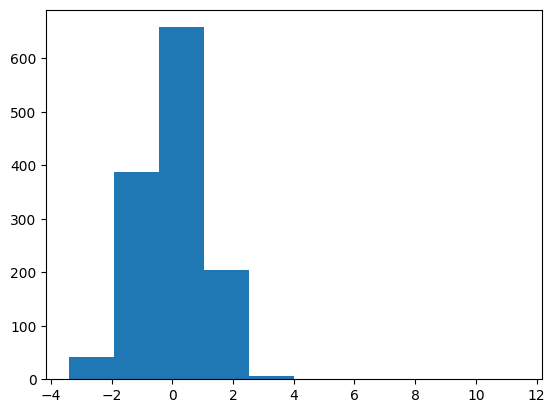

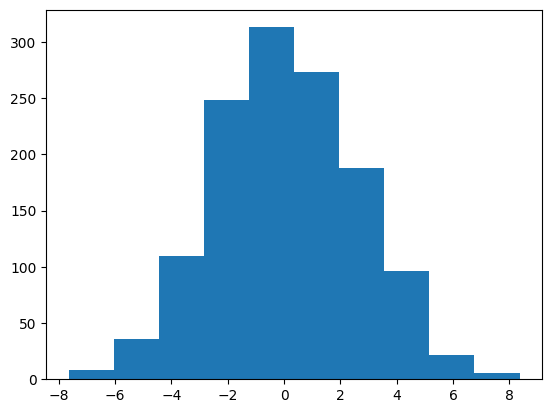

In [21]:
y_1 = model_1.stan_variable('y')[0]
plt.hist(y_1)
plt.show()

y_2= model_2.stan_variable('y')[0]
plt.hist(y_2)
plt.show()

data1 = {
    'N': N,
    'y': y1
}

data2={
    'N': N,
    'y': y2
}

In [ ]:
#Excercise 2 - compare normal and student models for data from first file



In [22]:
code_3= CmdStanModel(stan_file='code_3.stan')
code_4= CmdStanModel(stan_file='code_4.stan')

In [23]:

model_3_1= code_3.sample(data=data1, iter_sampling=1000, iter_warmup=1, chains =1, fixed_param=True)
model_3_2= code_3.sample(data=data2, iter_sampling=1000, iter_warmup=1, chains =1, fixed_param=True)

model_4_1 = code_4.sample(data=data1, iter_sampling=1000, iter_warmup=1, chains =1, fixed_param=True)
model_4_2 = code_4.sample(data=data2, iter_sampling=1000, iter_warmup=1, chains =1, fixed_param=True)

15:10:23 - cmdstanpy - INFO - CmdStan start processing
chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:01 Sampling completed


15:10:25 - cmdstanpy - INFO - CmdStan done processing.
15:10:25 - cmdstanpy - INFO - CmdStan start processing


chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:02 Sampling completed


15:10:27 - cmdstanpy - INFO - CmdStan done processing.


15:10:28 - cmdstanpy - INFO - CmdStan start processing
chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:02 Sampling completed


15:10:30 - cmdstanpy - INFO - CmdStan done processing.
15:10:30 - cmdstanpy - INFO - CmdStan start processing


chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:02 Sampling completed


15:10:33 - cmdstanpy - INFO - CmdStan done processing.


Text(0.5, 1.0, 'Comparison 2 data - WAIC')

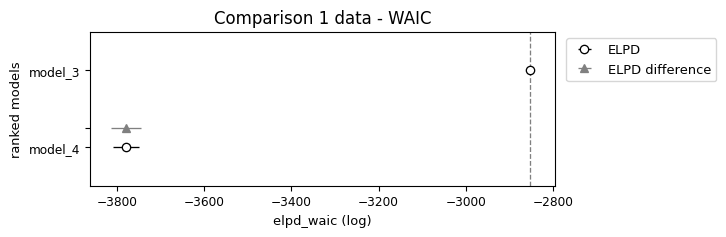

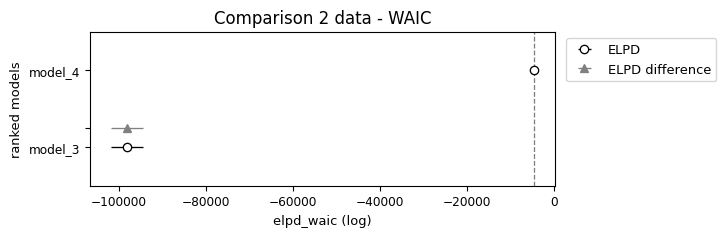

In [25]:
dict_1 = {'model_3':model_3_1, 'model_4':model_4_1}
dict_2 = {'model_3':model_3_2, 'model_4':model_4_2}

comparison_waic_1 = az.compare(dict_1, ic='waic')
az.plot_compare(comparison_waic_1)
plt.title('Comparison 1 data - WAIC')

comparison_waic_2 = az.compare(dict_2, ic='waic')
az.plot_compare(comparison_waic_2)
plt.title('Comparison 2 data - WAIC')

C:\Users\rafal\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\stats\stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
C:\Users\rafal\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\stats\stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
C:\Users\rafal\AppData

Text(0.5, 1.0, 'Comparison 2 data - LOO')

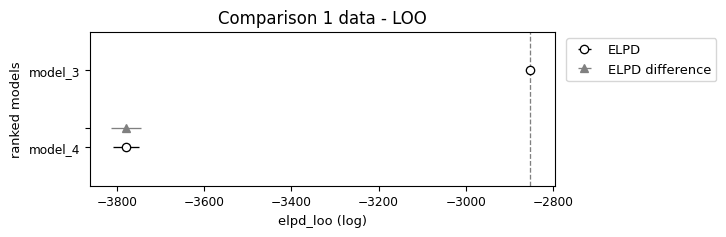

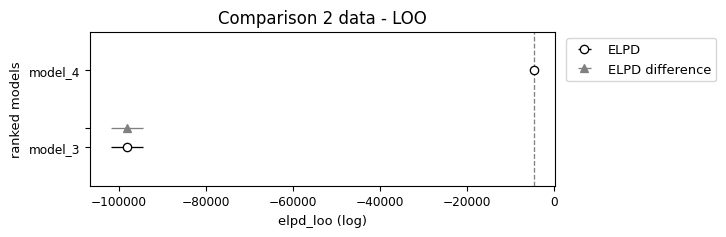

In [27]:
comparison_loo_1 = az.compare(dict_1, ic='loo')
az.plot_compare(comparison_loo_1)
plt.title('Comparison 1 data - LOO')

comparison_loo_2 = az.compare(dict_2, ic='loo')
az.plot_compare(comparison_loo_2)
plt.title('Comparison 2 data - LOO')

In [28]:
#Excercise 3 - compare models with different numbers of predictors 

In [32]:
x = model_2.stan_variable('X')

x_1 = x.reshape(1000, -1)[0:1,:N]
x_1 = np.transpose(x_1)

x_2 = x.reshape(1000, -1)[0:2,:N]
x_2 = np.transpose(x_2)

x_3 = x.reshape(1000, -1)[0:3,:N]
x_3 = np.transpose(x_3)

In [33]:
code_5 = CmdStanModel(stan_file = "code_5.stan")

model_5_1 = code_5.sample(data = {'N':N, 
                                       'K':1,
                                       'y':y_2,
                                       'X':x_1},
                               iter_sampling = 1000,
                               iter_warmup = 1, 
                               chains = 1, 
                               fixed_param = True)

model_5_2 = code_5.sample(data = {'N':N, 
                                       'K':2,
                                       'y':y_2,
                                       'X':x_2},
                               iter_sampling = 1000,
                               iter_warmup = 1, 
                               chains = 1, 
                               fixed_param = True)

model_5_3 = code_5.sample(data = {'N':N, 
                                       'K':3,
                                       'y':y_2,
                                       'X':x_3},
                               iter_sampling = 1000,
                               iter_warmup = 1, 
                               chains = 1, 
                               fixed_param = True)


15:28:48 - cmdstanpy - INFO - CmdStan start processing
chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:03 Sampling completed


15:28:51 - cmdstanpy - INFO - CmdStan done processing.


15:28:52 - cmdstanpy - INFO - CmdStan start processing
chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:02 Sampling completed


15:28:55 - cmdstanpy - INFO - CmdStan done processing.


15:28:55 - cmdstanpy - INFO - CmdStan start processing
chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:03 Sampling completed


15:28:58 - cmdstanpy - INFO - CmdStan done processing.


C:\Users\rafal\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\stats\stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
C:\Users\rafal\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\stats\stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
C:\Users\rafal\AppData

Text(0.5, 1.0, 'Model 5 loo comparison')

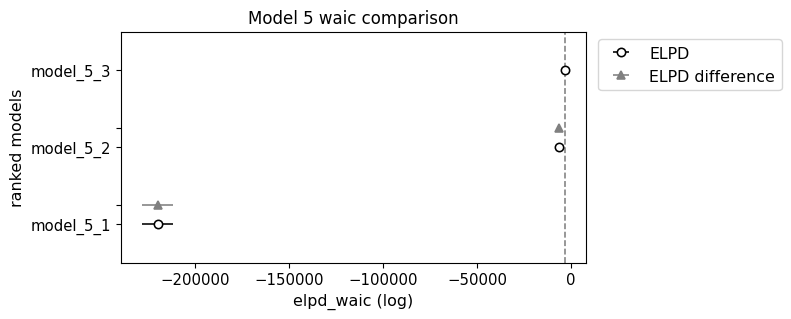

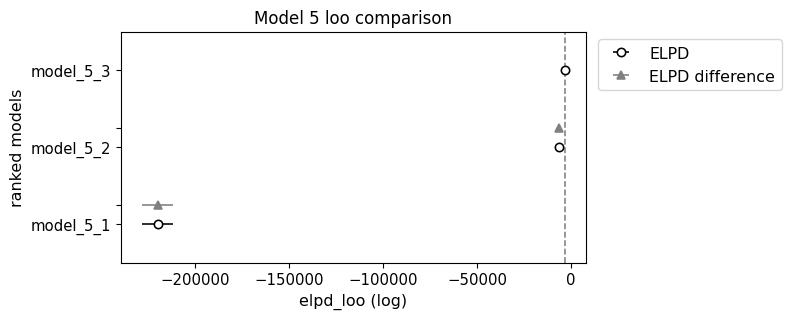

In [34]:
dict_3 = {'model_5_1':model_5_1, 'model_5_2':model_5_2, 'model_5_3':model_5_3}

waic_comparison = az.compare(dict_3, ic='waic')
loo_comparison = az.compare(dict_3, ic='loo', method="stacking", scale="log")

az.plot_compare(waic_comparison)
plt.title('Model 5 waic comparison')

az.plot_compare(loo_comparison)
plt.title('Model 5 loo comparison')